In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
input_folder = "dataset"  # Your dataset folder (contains subfolders for each disease)
output_folder = "preprocessed_dataset"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Image parameters
img_size = (224, 224)  # Resize all images to 224x224
augmentations_per_image = 5  # Number of augmented versions per image

# Data augmentation settings
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to range [0,1]
    rotation_range=20,  # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    horizontal_flip=True,  # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Random brightness adjustment
)

# Process each disease folder
for disease in os.listdir(input_folder):
    disease_path = os.path.join(input_folder, disease)
    output_disease_path = os.path.join(output_folder, disease)

    # Skip if it's not a directory
    if not os.path.isdir(disease_path):
        continue  

    os.makedirs(output_disease_path, exist_ok=True)

    for img_name in os.listdir(disease_path):
        img_path = os.path.join(disease_path, img_name)

        # Skip hidden/system files
        if img_name.startswith(".") or not img_name.lower().endswith(("png", "jpg", "jpeg")):
            continue

        try:
            # Load image with PIL
            with Image.open(img_path) as img:
                img = img.convert("RGB")  # Ensure 3-channel RGB
                img = img.resize(img_size)  # Resize to 224x224

                # Convert to NumPy array
                img_array = np.array(img) / 255.0  # Normalize pixel values (0-1)
                
                # Skip empty or corrupt images
                if img_array is None or img_array.size == 0:
                    print(f"⚠️ Skipping {img_name} (corrupt or empty)")
                    continue

                img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

                # Save original preprocessed image
                img_pil = Image.fromarray((img_array[0] * 255).astype(np.uint8))
                img_pil.save(os.path.join(output_disease_path, f"original_{img_name}"))

                # Generate and save augmented images
                aug_iter = datagen.flow(img_array, batch_size=1)
                for i in range(augmentations_per_image):
                    aug_img = next(aug_iter)[0]  # Get augmented image
                    aug_img_pil = Image.fromarray((aug_img * 255).astype(np.uint8))

                    # Save augmented image with unique name
                    aug_img_pil.save(os.path.join(output_disease_path, f"aug_{i}_{img_name}"))

        except Exception as e:
            print(f"⚠️ Error processing {img_name}: {e}")

print("✅ Image preprocessing completed! Check 'preprocessed_dataset/' folder.")




.h5 to tflite

In [4]:
import tensorflow as tf
#store .h5 file in your .py folder

#load h5 module
model=tf.keras.models.load_model('disease_detection_model.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)

#convert
tflite_model = tflite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model)

#done convertion

INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmp11vf5dtc\assets


INFO:tensorflow:Assets written to: C:\Users\Acer\AppData\Local\Temp\tmp11vf5dtc\assets


Saved artifact at 'C:\Users\Acer\AppData\Local\Temp\tmp11vf5dtc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  2410175114576: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  2410175118608: TensorSpec(shape=(1, 1, 1, 3), dtype=tf.float32, name=None)
  2410175114384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175112272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175111312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175112080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175114768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175110352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175110736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2410175109392: TensorSpec(shape=(), dtype=tf.resource, 

17346516

Image Generation Plus training 


🔍 Analyzing dataset...
Acne: 402 images
Carcinoma: 399 images
Eczema: 399 images
Keratosis: 399 images
Milia: 399 images
Rosacea: 399 images
Found 1922 images belonging to 6 classes.
Found 475 images belonging to 6 classes.

⚖️ Class weights: {0: 0.994824016563147, 1: 1.0010416666666666, 2: 1.0010416666666666, 3: 1.0010416666666666, 4: 1.0010416666666666, 5: 1.0010416666666666}

🧠 Initial Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,380,073 (16.71 MB)

 Trainable params: 329,990 (1.26 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

d:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1732 - auc: 0.5100 - loss: 6.1891

60/60 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.1732 - auc: 0.5099 - loss: 6.1868 - val_accuracy: 0.1786 - val_auc: 0.5012 - val_loss: 5.6123 - learning_rate: 1.0000e-04
Epoch 2/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 39s 665ms/step - accuracy: 0.1562 - auc: 0.5937 - loss: 5.7008

d:\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.1562 - auc: 0.5937 - loss: 5.7008 - val_accuracy: 0.1786 - val_auc: 0.5132 - val_loss: 5.6053 - learning_rate: 1.0000e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1606 - auc: 0.5058 - loss: 5.6650

60/60 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1607 - auc: 0.5059 - loss: 5.6636 - val_accuracy: 0.1763 - val_auc: 0.4985 - val_loss: 5.2673 - learning_rate: 1.0000e-04
Epoch 4/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 37s 639ms/step - accuracy: 0.1875 - auc: 0.5342 - loss: 5.3050

60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.1875 - auc: 0.5342 - loss: 5.3050 - val_accuracy: 0.1763 - val_auc: 0.4991 - val_loss: 5.2628 - learning_rate: 1.0000e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1713 - auc: 0.4968 - loss: 5.3510

60/60 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.1714 - auc: 0.4969 - loss: 5.3496 - val_accuracy: 0.1786 - val_auc: 0.5335 - val_loss: 4.9841 - learning_rate: 1.0000e-04
Epoch 6/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 34s 577ms/step - accuracy: 0.0938 - auc: 0.4339 - loss: 5.2360

60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 279ms/step - accuracy: 0.0938 - auc: 0.4339 - loss: 5.2360 - val_accuracy: 0.1786 - val_auc: 0.5312 - val_loss: 4.9811 - learning_rate: 1.0000e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1652 - auc: 0.4971 - loss: 5.0797

60/60 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1652 - auc: 0.4972 - loss: 5.0787 - val_accuracy: 0.1763 - val_auc: 0.5035 - val_loss: 4.7745 - learning_rate: 1.0000e-04
Epoch 8/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 33s 566ms/step - accuracy: 0.1562 - auc: 0.5152 - loss: 4.8479

60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 250ms/step - accuracy: 0.1562 - auc: 0.5152 - loss: 4.8479 - val_accuracy: 0.1763 - val_auc: 0.5053 - val_loss: 4.7688 - learning_rate: 1.0000e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1741 - auc: 0.5035 - loss: 4.8335

60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.1741 - auc: 0.5035 - loss: 4.8328 - val_accuracy: 0.1763 - val_auc: 0.4809 - val_loss: 4.5947 - learning_rate: 1.0000e-04
Epoch 10/10
 1/60 ━━━━━━━━━━━━━━━━━━━━ 26s 454ms/step - accuracy: 0.1875 - auc: 0.5305 - loss: 4.7613

60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 264ms/step - accuracy: 0.1875 - auc: 0.5305 - loss: 4.7613 - val_accuracy: 0.1161 - val_auc: 0.4732 - val_loss: 4.5898 - learning_rate: 1.0000e-04

🔧 Unfreezing base model for fine-tuning...
Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.1670 - auc: 0.5122 - loss: 5.6165 - val_accuracy: 0.1663 - val_auc: 0.4970 - val_loss: 4.7604
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.2281 - auc: 0.5834 - loss: 5.2448 - val_accuracy: 0.1663 - val_auc: 0.5037 - val_loss: 4.7112
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 248s 4s/step - accuracy: 0.2732 - auc: 0.6293 - loss: 5.0138 - val_accuracy: 0.1684 - val_auc: 0.5157 - val_loss: 4.7863
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 232s 4s/step - accuracy: 0.3256 - auc: 0.6936 - loss: 4.7532 - val_accuracy: 0.1684 - val_auc: 0.4802 - val_loss: 4.8829
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.3769 - auc: 0.7226 - loss: 4.6206 - val_accuracy: 0.1642 - val_auc: 0.4997 - val_l

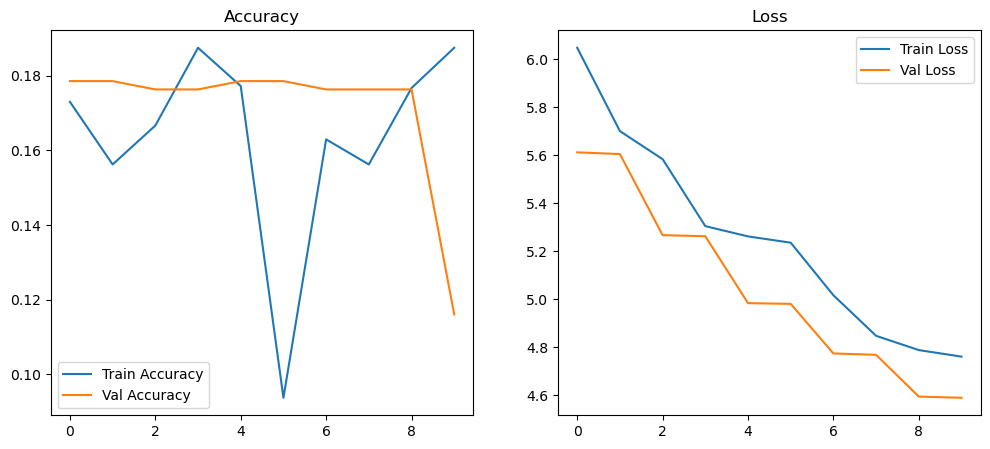


📊 Evaluating on validation set...
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.0956 - auc: 0.4388 - loss: 5.2500
✅ Validation Accuracy: 16.84%
✅ Validation AUC: 0.5086
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step



🧠 Prediction Class Distribution: Counter({4: 266, 3: 152, 2: 39, 0: 11, 5: 7})

✅ Final model saved to disease_detection_model.h5


In [2]:
import os
import numpy as np
from collections import Counter
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import regularizers

# CONFIGURATION
INPUT_FOLDER = "dataset"
MODEL_PATH = "disease_detection_model.h5"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10  # Increased for better training
CLASS_NAMES = sorted([f for f in os.listdir(INPUT_FOLDER) if os.path.isdir(os.path.join(INPUT_FOLDER, f))])
NUM_CLASSES = len(CLASS_NAMES)

# DATA PREPARATION
def prepare_data():
    print("\n🔍 Analyzing dataset...")
    for class_name in CLASS_NAMES:
        class_path = os.path.join(INPUT_FOLDER, class_name)
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
        print(f"{class_name}: {num_images} images")

    # Simplified and safer augmentations
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        brightness_range=[0.9, 1.1],
        validation_split=0.2
    )

    train_generator = datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        classes=CLASS_NAMES
    )

    val_generator = datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False,
        classes=CLASS_NAMES
    )

    # Class weights for imbalance
    class_counts = Counter(train_generator.classes)
    total = sum(class_counts.values())
    class_weights = {cls: total/(count * NUM_CLASSES) for cls, count in class_counts.items()}
    
    print("\n⚖️ Class weights:", class_weights)
    return train_generator, val_generator, class_weights

# MODEL
def build_model():
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    )
    base_model.trainable = False  # Freeze for initial training

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name="auc")]
    )
    return model

# TRAINING
def train():
    train_gen, val_gen, class_weights = prepare_data()
    model = build_model()
    print("\n🧠 Initial Model Summary:")
    model.summary()

    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint(MODEL_PATH, save_best_only=True),
        ReduceLROnPlateau(factor=0.2, patience=5)
    ]

    history = model.fit(
        train_gen,
        steps_per_epoch=train_gen.samples // BATCH_SIZE,
        validation_data=val_gen,
        validation_steps=val_gen.samples // BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )

    # 🔄 Fine-tune base model
    print("\n🔧 Unfreezing base model for fine-tuning...")
    model.layers[0].trainable = True  # Unfreeze EfficientNet
    model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower LR for fine-tuning
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name="auc")])

    model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=5  # Fine-tuning phase
    )

    # 📊 Plot results
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.savefig('training_results.png')
    plt.show()

    # 📈 Evaluation
    print("\n📊 Evaluating on validation set...")
    val_loss, val_acc, val_auc = model.evaluate(val_gen)
    print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")
    print(f"✅ Validation AUC: {val_auc:.4f}")

    # 🔍 Predict distribution
    predictions = model.predict(val_gen)
    predicted_classes = np.argmax(predictions, axis=1)
    print("\n🧠 Prediction Class Distribution:", Counter(predicted_classes))

    # ✅ Save final model
    model.save(MODEL_PATH)
    print(f"\n✅ Final model saved to {MODEL_PATH}")

if __name__ == "__main__":
    train()


training 2



🔍 Analyzing and optimizing dataset...
Acne: 402 images
Carcinoma: 399 images
Eczema: 399 images
Keratosis: 399 images
Milia: 399 images
Rosacea: 399 images
Found 1922 images belonging to 6 classes.
Found 475 images belonging to 6 classes.

⚖️ Optimized class weights: {0: 0.9974086507360697, 1: 1.0005206977702494, 2: 1.0005206977702494, 3: 1.0005206977702494, 4: 1.0005206977702494, 5: 1.0005206977702494}

Optimized Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,874,025 (18.59 MB)

 Trainable params: 4,110,366 (15.68 MB)

 Non-trainable params: 763,659 (2.91 MB)

d:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1951 - auc: 0.5162 - loss: 7.7060 - precision: 0.2203 - recall: 0.0724

60/60 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1950 - auc: 0.5162 - loss: 7.7056 - precision: 0.2201 - recall: 0.0723 - val_accuracy: 0.1719 - val_auc: 0.5003 - val_loss: 7.1695 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 2/6
 1/60 ━━━━━━━━━━━━━━━━━━━━ 58s 1000ms/step - accuracy: 0.2812 - auc: 0.5292 - loss: 7.4853 - precision: 0.1250 - recall: 0.0312

d:\anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - accuracy: 0.2812 - auc: 0.5292 - loss: 7.4853 - precision: 0.1250 - recall: 0.0312 - val_accuracy: 0.1719 - val_auc: 0.5060 - val_loss: 7.1683 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 3/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.2001 - auc: 0.5372 - loss: 7.5489 - precision: 0.2382 - recall: 0.0712 - val_accuracy: 0.1652 - val_auc: 0.4952 - val_loss: 7.2279 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 4/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 294ms/step - accuracy: 0.1875 - auc: 0.4978 - loss: 7.6180 - precision: 0.0909 - recall: 0.0312 - val_accuracy: 0.1652 - val_auc: 0.4931 - val_loss: 7.2283 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 5/6
60/60 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.1983 - auc: 0.5193 - loss: 7.5612 - precision: 0.2191 - recall: 0.0576 - val_accuracy: 0.1719 - val_auc: 0.5053 - 

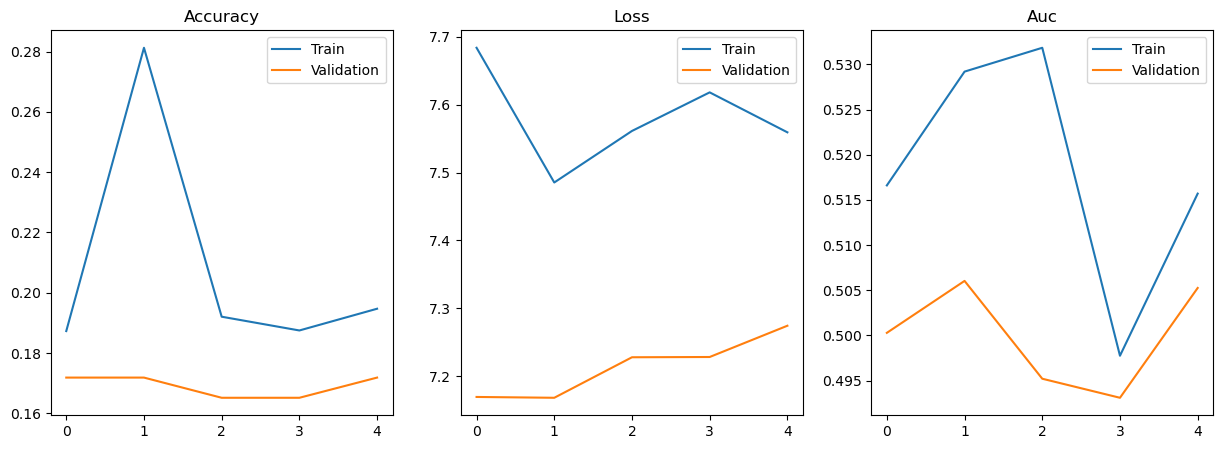


Optimized Model Evaluation:
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.1826 - auc: 0.5118 - loss: 7.1636 - precision: 0.0000e+00 - recall: 0.0000e+00


Validation Accuracy: 16.63%
Validation AUC: 0.4989
Validation Precision: 0.0000
Validation Recall: 0.0000

✅ Optimized model saved to optimized_disease_model.h5


In [4]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import regularizers
from collections import Counter
import matplotlib.pyplot as plt

# ====================== OPTIMIZED CONFIGURATION ======================
INPUT_FOLDER = "dataset"
MODEL_PATH = "optimized_disease_model.h5"
IMG_SIZE = (224, 224)  
BATCH_SIZE = 32
EPOCHS = 6  # Reduced to 6 as requested
CLASS_NAMES = sorted(os.listdir(INPUT_FOLDER))
NUM_CLASSES = len(CLASS_NAMES)

# ====================== ENHANCED DATA PREPARATION ======================
def prepare_data():
    print("\n🔍 Analyzing and optimizing dataset...")
    
    # Verify dataset structure
    for class_name in CLASS_NAMES:
        class_path = os.path.join(INPUT_FOLDER, class_name)
        if not os.path.isdir(class_path):
            raise ValueError(f"Missing class folder: {class_path}")
        num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
        print(f"{class_name}: {num_images} images")

    # Enhanced data augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,  # Slightly reduced from 40
        width_shift_range=0.15,  # More conservative shifts
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.8, 1.2],  # Narrower range for medical images
        fill_mode='reflect',  # Better for lesion boundaries
        validation_split=0.2
    )

    # Load data with optimized settings
    train_generator = train_datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True,
        classes=CLASS_NAMES
    )

    val_generator = train_datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        classes=CLASS_NAMES
    )

    # Enhanced class weighting
    class_counts = Counter(train_generator.classes)
    total = sum(class_counts.values())
    class_weights = {cls: (total/(count * NUM_CLASSES))**0.5 for cls, count in class_counts.items()}  # Square root for smoother weighting
    
    print("\n⚖️ Optimized class weights:", class_weights)
    return train_generator, val_generator, class_weights

# ====================== OPTIMIZED MODEL ARCHITECTURE ======================
def build_optimized_model():
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
    )
    
    # Partial unfreezing for better fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:150]:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # Additional ReLU layer
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),  # Additional ReLU layer
        BatchNormalization(),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.00005),  # Lower learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy', 
                tf.keras.metrics.AUC(name='auc'),
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )
    
    return model

# ====================== OPTIMIZED TRAINING ======================
def train_optimized():
    train_gen, val_gen, class_weights = prepare_data()
    
    model = build_optimized_model()
    print("\nOptimized Model Summary:")
    model.summary()

    # Enhanced callbacks
    callbacks = [
        EarlyStopping(patience=3, monitor='val_auc', mode='max', restore_best_weights=True),
        ModelCheckpoint(MODEL_PATH, monitor='val_auc', mode='max', save_best_only=True),
        ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=2, min_lr=1e-6),
        TensorBoard(log_dir='./logs_optimized')
    ]

    # Optimized training
    history = model.fit(
        train_gen,
        steps_per_epoch=max(1, train_gen.samples // BATCH_SIZE),  # Ensure at least 1 step
        validation_data=val_gen,
        validation_steps=max(1, val_gen.samples // BATCH_SIZE),
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )

    # Enhanced visualization
    plt.figure(figsize=(15, 5))
    metrics = ['accuracy', 'loss', 'auc']
    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i+1)
        plt.plot(history.history[metric], label='Train')
        plt.plot(history.history[f'val_{metric}'], label='Validation')
        plt.title(metric.capitalize())
        plt.legend()
    plt.savefig('optimized_training_results.png')
    plt.show()

    # Comprehensive evaluation
    print("\nOptimized Model Evaluation:")
    val_loss, val_acc, val_auc, val_precision, val_recall = model.evaluate(val_gen)
    print(f"Validation Accuracy: {val_acc*100:.2f}%")
    print(f"Validation AUC: {val_auc:.4f}")
    print(f"Validation Precision: {val_precision:.4f}")
    print(f"Validation Recall: {val_recall:.4f}")

    model.save(MODEL_PATH)
    print(f"\n✅ Optimized model saved to {MODEL_PATH}")

if __name__ == "__main__":
    train_optimized()

Prediction1


In [9]:
import os
import numpy as np
from PIL import Image, ImageOps, ImageEnhance
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Configuration
MODEL_PATH = "disease_detection_model.h5"
IMG_SIZE = (224, 224)
DATASET_DIR = "dataset"

class SkinDiseasePredictor:
    def __init__(self):
        """Load the trained model and class names."""
        try:
            self.model = load_model(MODEL_PATH)
            print("✅ Model loaded successfully")
        except Exception as e:
            print(f"❌ Failed to load model: {e}")
            raise

        if not os.path.exists(DATASET_DIR):
            raise FileNotFoundError(f"❌ Dataset directory '{DATASET_DIR}' not found")

        self.class_names = sorted([
            folder for folder in os.listdir(DATASET_DIR)
            if os.path.isdir(os.path.join(DATASET_DIR, folder))
        ])
        print(f"📂 Loaded {len(self.class_names)} classes: {self.class_names}")

    def preprocess_image(self, image_path):
        """Prepare image for prediction."""
        try:
            img = Image.open(image_path).convert('RGB')

            # Enhance image
            img = ImageOps.autocontrast(img, cutoff=3)
            img = ImageEnhance.Sharpness(img).enhance(1.5)

            # Resize and normalize
            img.thumbnail((IMG_SIZE[0]*2, IMG_SIZE[1]*2), Image.LANCZOS)
            img = img.resize(IMG_SIZE, Image.LANCZOS)

            img_array = np.array(img) / 255.0
            return np.expand_dims(img_array, axis=0)
        except Exception as e:
            print(f"❌ Image processing failed: {e}")
            return None

    def predict(self, image_path, top_n=3):
        """Make prediction and visualize results."""
        processed_img = self.preprocess_image(image_path)
        if processed_img is None:
            return None

        predictions = self.model.predict(processed_img)[0]
        sorted_indices = np.argsort(predictions)[::-1]

        # Visualization
        plt.figure(figsize=(15, 6))

        # Original image
        plt.subplot(1, 2, 1)
        original_img = Image.open(image_path)
        plt.imshow(original_img)
        plt.title("Input Image")
        plt.axis('off')

        # Bar chart
        plt.subplot(1, 2, 2)
        colors = ['#2ecc71' if i == sorted_indices[0] else '#3498db' for i in range(len(predictions))]
        bars = plt.barh(self.class_names, predictions, color=colors)
        plt.xlim(0, 1)
        plt.title("Diagnosis Confidence")

        for bar, prob in zip(bars, predictions):
            width = bar.get_width()
            plt.text(width + 0.02, bar.get_y() + bar.get_height() / 2,
                     f"{prob*100:.1f}%", va='center')

        plt.tight_layout()
        plt.savefig('diagnosis_report.png')
        plt.show()

        return {
            'top_prediction': {
                'class': self.class_names[sorted_indices[0]],
                'confidence': float(predictions[sorted_indices[0]])
            },
            'all_predictions': [
                {'class': self.class_names[i], 'confidence': float(predictions[i])}
                for i in sorted_indices[:top_n]
            ]
        }

if __name__ == "__main__":
    predictor = SkinDiseasePredictor()

    test_image = "test_sample.jpg"  # Replace with your actual test image file
    if os.path.exists(test_image):
        print(f"\n🔍 Analyzing {test_image}...")
        results = predictor.predict(test_image)

        if results:
            print("\n📋 DIAGNOSIS REPORT:")
            print(f"Most likely: {results['top_prediction']['class']} ({results['top_prediction']['confidence']*100:.1f}%)")
            print("\nOther predictions:")
            for pred in results['all_predictions']:
                print(f"- {pred['class']}: {pred['confidence']*100:.1f}%")
            print("\n📊 Visualization saved to 'diagnosis_report.png'")
    else:
        print(f"❌ Error: Test image '{test_image}' not found")
        print("Current directory contains:", os.listdir('.'))


❌ Failed to load model: [Errno 2] Unable to open file (unable to open file: name = 'optimized_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'optimized_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Prediction 2

Predictions

In [ ]:
import os
import numpy as np
from PIL import Image, ImageEnhance, ImageOps
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import regularizers
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#  CONFIGURATION 
INPUT_FOLDER = "dataset"
MODEL_PATH = "skin_condition_model.h5"
IMG_SIZE = (300, 300)  
BATCH_SIZE = 16
EPOCHS = 120
CLASS_NAMES = sorted(['Acne', 'Carcinoma', 'Eczema', 'Keratosis', 'Milia', 'Rosacea'])  
NUM_CLASSES = len(CLASS_NAMES)

#  MEDICAL IMAGE ENHANCEMENT 
def enhance_medical_image(image):
    """Specialized preprocessing for skin condition images"""
    image = ImageOps.equalize(image)
    image = ImageEnhance.Sharpness(image).enhance(2.0)
    image = ImageEnhance.Contrast(image).enhance(1.5)
    r, g, b = image.split()
    r = ImageEnhance.Brightness(r).enhance(1.1)
    b = ImageEnhance.Brightness(b).enhance(0.9)
    image = Image.merge('RGB', (r, g, b))
    return image

# DATA GENERATOR 
def create_generators():
    def preprocess_image(x):
        return np.array(enhance_medical_image(Image.fromarray((x * 255).astype('uint8')))) / 255.0

    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_image,
        rotation_range=45,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.2,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.7, 1.4],
        fill_mode='reflect',
        validation_split=0.15
    )

    train_generator = train_datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        classes=CLASS_NAMES,
        shuffle=True
    )

    val_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_image,
        validation_split=0.15
    )

    val_generator = val_datagen.flow_from_directory(
        INPUT_FOLDER,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        classes=CLASS_NAMES
    )
    return train_generator, val_generator

#  MODEL ARCHITECTURE 
def build_model():
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
        drop_connect_rate=0.4
    )
    base_model.trainable = True

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.6),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall'),
                 tf.keras.metrics.AUC(name='auc', multi_label=True)]
    )
    return model

#  TRAINING 
def train_model():
    train_gen, val_gen = create_generators()
    
    class_counts = Counter(train_gen.labels)
    total = sum(class_counts.values())
    class_weights = {i: total / (count * NUM_CLASSES) for i, count in class_counts.items()}
    
    model = build_model()
    
    callbacks = [
        EarlyStopping(patience=15, monitor='val_auc', mode='max', restore_best_weights=True),
        ModelCheckpoint(MODEL_PATH, monitor='val_auc', mode='max', save_best_only=True),
        ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=5, min_lr=1e-7),
        TensorBoard(log_dir='./logs')
    ]
    
    history = model.fit(
        train_gen,
        steps_per_epoch=len(train_gen),
        validation_data=val_gen,
        validation_steps=len(val_gen),
        epochs=EPOCHS,
        callbacks=callbacks,
        class_weight=class_weights
    )
    
    val_report = classification_report(
        val_gen.labels,
        model.predict(val_gen).argmax(axis=1),
        target_names=CLASS_NAMES
    )
    print(val_report)
    
    with open('training_report.txt', 'w') as f:
        f.write(val_report)
    
    return model

# PREDICTION
class SkinConditionPredictor:
    def __init__(self, model_path=MODEL_PATH):
        self.model = load_model(model_path)
        self.class_names = CLASS_NAMES

    def preprocess(self, image_path):
        img = Image.open(image_path).convert('RGB')
        img = enhance_medical_image(img)
        img = img.resize(IMG_SIZE)
        img_array = np.array(img) / 255.0
        return np.expand_dims(img_array, axis=0)

    def predict(self, image_path, top_n=3):
        processed_img = self.preprocess(image_path)
        preds = self.model.predict(processed_img)[0]
        sorted_indices = np.argsort(preds)[::-1][:top_n]
        
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(Image.open(image_path))
        plt.title("Original Image")
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(enhance_medical_image(Image.open(image_path)))
        plt.title("Enhanced View")
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.barh(self.class_names, preds, color=['#2ecc71' if i == sorted_indices[0] else '#3498db' for i in range(len(preds))])
        plt.title("Diagnosis Confidence")
        plt.xlim(0, 1)
        plt.show()
        
        return {self.class_names[i]: float(preds[i]) for i in sorted_indices}

if __name__ == "__main__":
    trained_model = train_model()

